In [3]:
# Import Dependencies including SQLAlchemy and related
from sqlalchemy import create_engine
import psycopg2 as ps
import pandas as pd

In [4]:
#Connect to the database

In [5]:
connection = ps.connect(user="yyy",
                password="xxx",
                host="127.0.0.1",
                port="5432",
                database="stores")

In [6]:
#Copy the database tables to dataframes

In [7]:
departments = pd.read_sql('select * from departments', connection)
dept_emp = pd.read_sql('select * from dept_emp', connection)
dept_manager= pd.read_sql('select * from dept_manager', connection)
employees = pd.read_sql('select * from employees', connection)
salaries = pd.read_sql('select * from salaries', connection)
title = pd.read_sql('select * from title', connection)

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [9]:
x=salaries['salary']
print(f'maximum salary= {x.max()} -- minimum salary= {x.min()}')

maximum salary= 129492 -- minimum salary= 40000


<IPython.core.display.Javascript object>


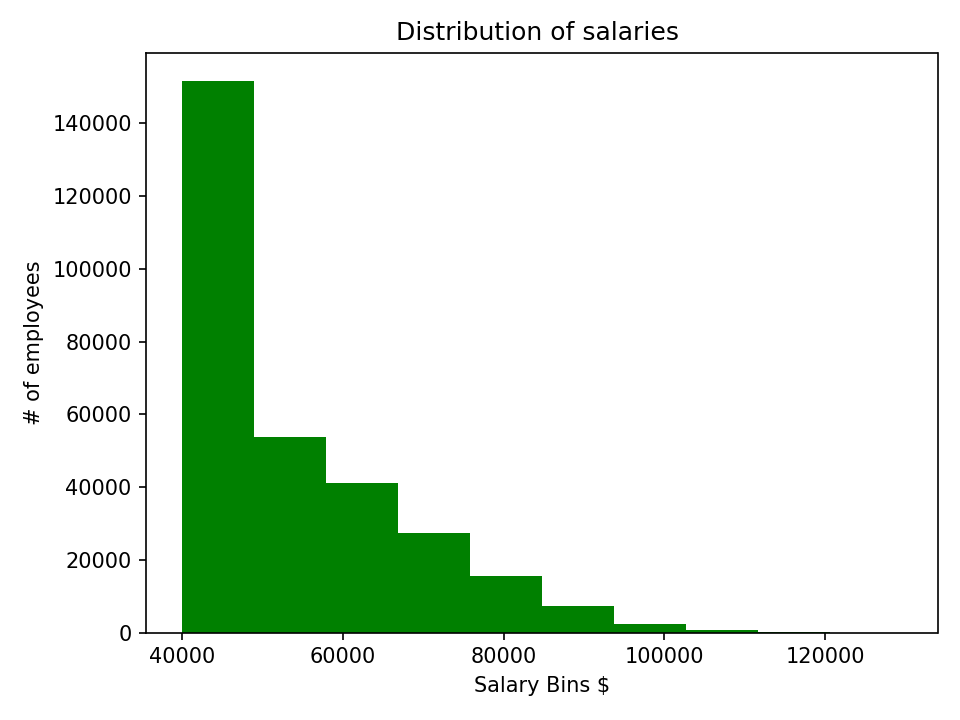

In [10]:
#create a histogram to visualize the most common salary ranges for employees
fig, ax=plt.subplots()

plt.hist(x, histtype='bar', orientation='vertical', color='green', 
         label='count')

ax.set_xlabel('Salary Bins $')
ax.set_ylabel('# of employees')
ax.set_title(r'Distribution of salaries ')

fig.tight_layout()
plt.savefig('hist_salaries.png')


In [48]:
#Calculate the average salary per title

In [49]:
df= pd.read_sql("select employees.emp_no, title.title, salaries.salary"\
" from employees left outer join salaries on employees.emp_no ="\
" salaries.salary left outer join title on employees.emp_title ="\
" title.title_id;",connection)

In [50]:
title_salary=df.groupby(by=['title']).mean()


In [51]:
a=['Assistant Engineer','Engineer','Manager','Senior Engineer','Senior Staff','Staff','Technique Leader']
b=title_salary['salary'].tolist()
#a,b

<IPython.core.display.Javascript object>


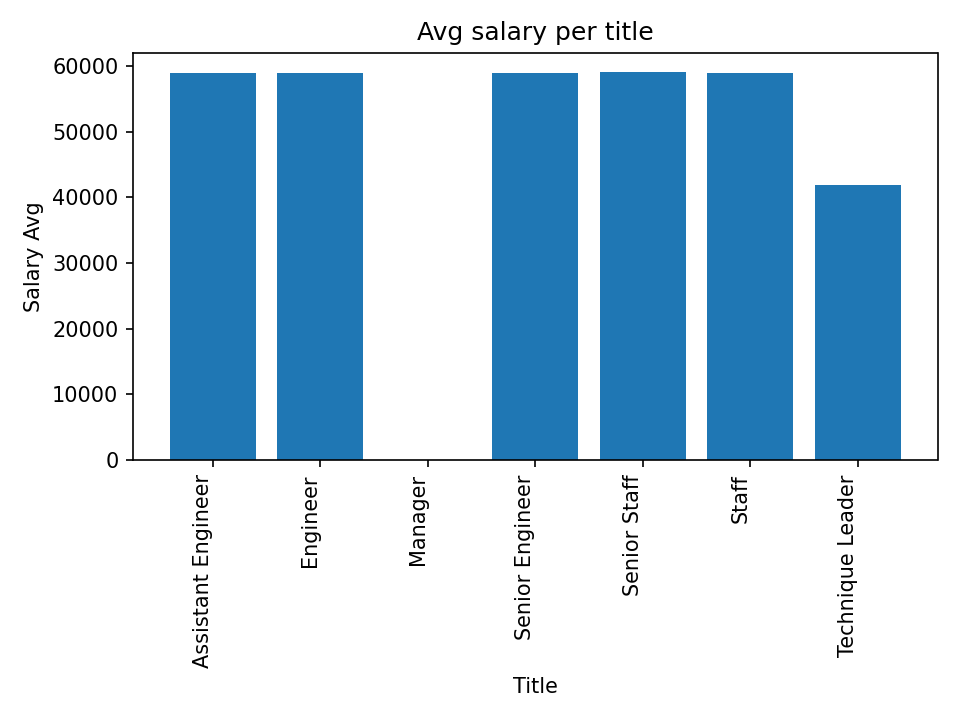

In [60]:
#create a histogram to visualize the most common salary ranges for employees
fig= plt.figure()
ax = fig.add_subplot(111)

ax.bar(a, b)
ax.set_xlabel('Title')
ax.set_ylabel('Salary Avg')
ax.set_title('Avg salary per title')
ax.set_xticks(a)
ax.set_xticklabels(a, rotation=90, ha='right')
plt.tight_layout()
plt.savefig('hist_titles.png')
plt.show()

In [ ]:
#Conclusion: This is a fake dataset, Technique leader has no salary,
#the other titles are not very different from each other (in average)
#and there is no information about manager's salary